In [1]:
from functools import reduce
import os
from matplotlib import colors 
import numpy as np
from numpy.core.fromnumeric import size 
from sympy import *
import matplotlib.pyplot as plt
import scipy.interpolate as spi

（1） 使用Newton迭代法找到的五个根为:[-1.381, -0.667, 0.205, 1.176, 0.5]
（2） 使用割线法找到的5个实根为:[-1.381, -0.667, 0.205, 1.176, 0.5]


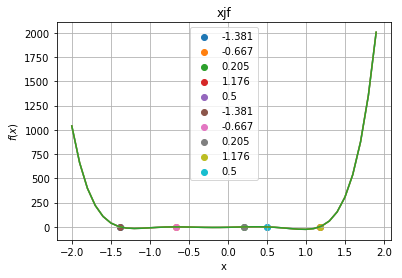

In [16]:
import random 	

def f6(x):
	'''第6题函数'''
	return 54*pow(x,6)+45*pow(x,5)-102*pow(x,4)-69*pow(x,3)+35*pow(x,2)+16*x-4
def f6d(x):
	'''第6题函数的导数'''
	return 54*6*pow(x,5)+45*5*pow(x,4)-102*4*pow(x,3)-69*3*pow(x,2)+35*2*x+16
def problem60():
	'''
	54*x6+45*x5-102*x4-69*x3+35*x2+16*x-4,,[-2,2]
	画出图像
	(1)使用牛顿迭代法,求出区间上的五个根
	'''
	if not os.path.exists('./36'):
		os.makedirs('./36')

	#这段代码是用来画函数图像的
	x=[]
	i=-2
	while(i<2):
		x.append(i)
		i=i+0.1
	y=[f6(i) for i in x]
	plt.figure
	plt.xlabel('x')
	plt.ylabel('$f(x)$')
 
	plt.plot(x,y)
	plt.grid()
	plt.title('6(1)-origin')
	plt.savefig('./36/src.png')
def problem61():
	'''
	54*x6+45*x5-102*x4-69*x3+35*x2+16*x-4,,[-2,2]
	画出图像
	(1)使用牛顿迭代法,求出区间上的五个根
	'''
	if not os.path.exists('./36'):
		os.makedirs('./36')

	#这段代码是用来画函数图像的
	x=[]
	i=-2
	while(i<2):
		x.append(i)
		i=i+0.1
	y=[f6(i) for i in x]
	plt.figure
	plt.xlabel('x')
	plt.ylabel('$f(x)$')
 
	plt.plot(x,y)

	#这段代码是使用牛顿法来找五个零点的
	radio=[]#用来存储比值ei+1/ei
	radio2=[]#存储比值ei+1/ei*ei
	real=[]#用来存储根
	start=-2#区间左端点
	end=2#区间右端点
	while(len(real)<5):
		#找到五个解停止
		x=start #x:迭代的初始值
		f=f6(x)#原始方程
		fd=f6d(x)#原始方程导数
		x_real= x-f/fd#牛顿法迭代一次
		d=abs(x_real-x)#求精度值
		while(d>1e-5):
			x=x_real
			f=f6(x)#原始方程
			fd=f6d(x)#原始方程导数
			x_real= x-f/fd#牛顿法迭代一次
			d=abs(x_real-x)#求精度值
		#[-1.3813, -0.66666, 0.20518, 0.5, 1.17612]

		'''
		请注意,在一次牛顿迭代法结束之后,找到的解是否是新的解,需要进行判断,
		首先判断当前找到的解是否在给定区间[-2,2]内
		然后判断当前解是否已经找到过了,这个是用过保留解的三位小数来进行的
		如果当前解在给定区间且保留三位小数后和之前找到的解不相同,则被视作新的解
		'''
		if x_real<end :
			flag=False
			for r in real :
				if abs(x_real-r)<1e-3:
					flag=True
			if not flag:
				real.append(round(x_real,3))
		'''
			每一次找到新的解之后,需要对查找区间进行迭代,把新的解加上一个小数视作
			查找区间的左端点,如果这个左端点大于右端点2,则再随机减去一个小端点
		'''
		start=x_real+random.random()
		if start >end :
			start=x_real-random.random()
		#print(start)
	print(f'（1） 使用Newton迭代法找到的五个根为:{real}')
	for c,r in enumerate(real):
		plt.scatter(r,0,label=f'{str(r)}')
	plt.legend()
	plt.grid()
	plt.title('Newton')
	plt.savefig('./36/newton.png')
	for i in range(len(real)-1):
		radio.append(real[i+1]/real[i])
		radio2.append(real[i+1]/(real[i]*real[i]))
	# for r in range(4):
	# 	print(f'{radio[r]},{radio2[r]}')
def problem62():
	'''
	54*x6+45*x5-102*x4-69*x3+35*x2+16*x-4,,[-2,2]
	画出图像
	(2)使用弦截法,求出区间上的五个根,并判断哪个跟是线性收敛,哪个根是超线性收敛
	目前并没有判断哪个是线性收敛,哪个是非线性收敛
	'''
	if not os.path.exists('./36'):
		os.makedirs('./36')

	#这段代码是用来画函数图像的
	x=[]
	i=-2
	while(i<2):
		x.append(i)
		i=i+0.1
	y=[f6(i) for i in x]
	plt.figure
	plt.xlabel('x')
	plt.ylabel('$f(x)$')
	
	plt.plot(x,y)

	#这段代码是使用弦截法来找五个零点的

	real=[]#用来存储根
	start=-2#区间左端点
	end=2#区间右端点
	while(len(real)<5):
		#找到五个解停止
		x0=start #x:迭代的初始值
		x1=x0+0.1
		f1=f6(x1)#f1
		f0=f6(x0)#f0
		x_real=x1-(f1*(x1-x0))/(f1-f0)#弦截法迭代一次
		d=abs(x_real-x1)#求精度值
		while(d>1e-5):
			x0=x1 
			x1=x_real
			f1=f6(x1)#f1
			f0=f6(x0)#f0
			x_real=x1-(f1*(x1-x0))/(f1-f0)#弦截法迭代一次
			d=abs(x_real-x1)#求精度值
		#[-1.381, -0.667, 0.205, 1.176, 0.5]

		'''
		请注意,在一次弦截法结束之后,找到的解是否是新的解,需要进行判断,
		首先判断当前找到的解是否在给定区间[-2,2]内
		然后判断当前解是否已经找到过了,这个是用过保留解的三位小数来进行的
		如果当前解在给定区间且保留三位小数后和之前找到的解不相同,则被视作新的解
		'''
		if x_real<end :
			flag=False
			for r in real :
				if abs(x_real-r)<1e-3:
					flag=True
			if not flag:
				real.append(round(x_real,3))
		'''
			每一次找到新的解之后,需要对查找区间进行迭代,把新的解加上一个小数视作
			查找区间的左端点,如果这个左端点大于右端点2,则再随机减去一个小端点
		'''
		start=x_real+random.random()
		if start >end :
			start=x_real-random.random()
		#print(start)
	print(f'（2） 使用割线法找到的5个实根为:{real}')
	for c,r in enumerate(real):
		plt.scatter(r,0,label=f'{str(r)}')
	plt.legend()
	plt.grid()
	plt.title('xjf')
	plt.savefig('./36/xjf.png')
 
if __name__=="__main__":
	problem60()
	problem61()
	problem62()

# 4.1

In [2]:
def lagrange(X, Y,  x_test):
	'''
	X,Y分别代表插值节点的x,y坐标列表,x_test是待插点的横坐标
	'''
	sum=0
	L=np.zeros(len(X))
	for j in range(len(X)):
		L[j]=1
		for i in range(len(X)):
			if X[i]!=X[j]:
				L[j]=L[j]*( (x_test-X[i])/(X[j]-X[i])  )
	for i in range (len(X)):
		sum=sum+Y[i]*L[i]

	return sum
	
def f1x(x):
	return 1/(1+x**2)

In [3]:
def  problem1():
	'''
	fx=1/(1+x^2),[-5,5],分别取2,1,0.5位单位长度的等距结点作为差值结点
	用Lagrange方法插值,将原函数图与插值函数图进行比较,观察插值效果
	'''
	if not os.path.exists('./41'):
		os.mkdir('./41')
	print(f'《数值分析方法与应用》第217页第四单元第1题结果已经保存到./41文件夹内')
	#画出原图
	X0=[]
	start=-5
	end=5
	while(start<=end):
		X0.append(start)
		start+=0.1
	plt.figure()
	plt.subplot(221)
	plt.plot(X0,[f1x(x) for x in X0])
	plt.grid()
	plt.title('Origin')
	
	setp=[2, 1,0.5]
	for c,s in enumerate(setp):
		plt.subplot(2,2,c+2)
		a=-5
		b=5
		X=[ a+i*s for i in range(int((b-a)/s))]#真实X
		Y=[f1x(x) for x in X]#真实Y
		XL=list(np.linspace(a, b, 100))
		YL=[lagrange(X,Y,xl) for xl  in  XL ]
		plt.plot(XL,YL)
		plt.grid()
		plt.title(f'step={str(s)}')
	plt.tight_layout()
	plt.savefig('./41/img.png')


	return 

《数值分析方法与应用》第217页第四单元第1题结果已经保存到./41文件夹内


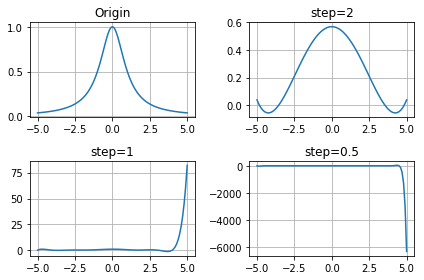

In [4]:
problem1()

# 4-2

In [5]:
def problem2():
    '''
    使用三次样条插值插值上题中的差值节点,并画图比较插值效果
    '''
    if not os.path.exists('./42'):
        os.mkdir('./42')
    #数据准备
    print(f'《数值分析方法与应用》第217页第四单元第2题结果已经保存到./42文件夹内')
    steps=[2,1,0.5]

    for s in steps:
        plt.figure()
        X=np.arange(-5,5,s) #定义样本点X，从-5到5每次间隔0.1
        Y= 1/(1+X**2)#定义样本点Y，形成fx

        new_x=np.arange(-5,5,0.1) #定义差值点)
        #进行三次样条拟合
        ipo3=spi.splrep(X,Y,k=3) #样本点导入，生成参数
        new_y=spi.splev(new_x,ipo3) #根据观测点和样条参数，生成插值
        plt.scatter(X,Y,color='r')  
        
        plt.plot(new_x,new_y)
        plt.legend([f'step={s}','origin',])
        plt.grid()
        plt.tight_layout()
        
        plt.savefig('./42/'+str(s)+'.png')

《数值分析方法与应用》第217页第四单元第2题结果已经保存到./42文件夹内


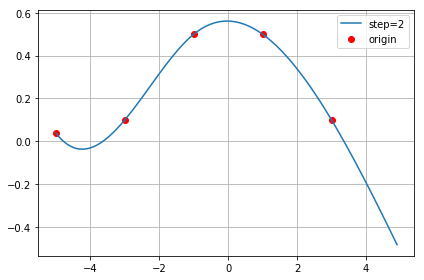

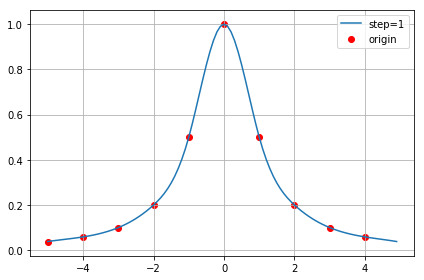

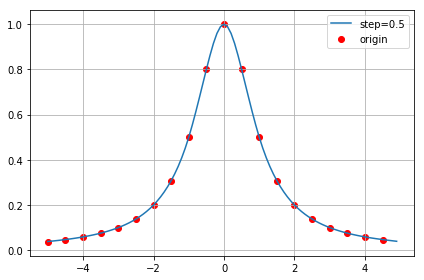

In [6]:
problem2()

# 4-4
## 4-4.1

In [11]:
from scipy import integrate
import math

def problem41():
	'''
	(x,x^2),n=5,10,15,20,25,30
	(1)用直线拟合数据,求出直线表达式的变化
	(2)求f(c1,c2)=0-1|(x^2-c1-c2x)dx,解释和(1)的关系
	'''
	if not os.path.exists('./44'):
		os.mkdir('./44')
	N=[i for i in range(5,35,5)]
	plt.figure()
	number=len(N)
	i=1
	for n in N :
		plt.subplot(2,int(number/2),i)
		X=np.array([i/n for i in range(n+1)])
		Y=np.array([x**2 for x in X])

		mean_x=np.mean(X)
		mean_y=np.mean(Y)
		k=(np.sum(X*Y)-np.prod(X.shape)*mean_x*mean_y)/(np.sum(X**2)-np.prod(X.shape)*mean_x**2)
		#meanx,meany,
		b=mean_y-k*mean_x
		print(f'n={n}时,拟合得到的直线的k={k},b={b}')
		Y_pre=[k*x+b for x in X]
		plt.xlabel('x')
		plt.ylabel('y')
		plt.scatter(X,Y)	
		plt.plot(X,Y_pre,'-r')
		plt.grid()
		plt.legend(['Line','Origin'])
		plt.title(f'n={n},k={round(k,2)},b={round(b)}')
		i=i+1
	plt.tight_layout()
	plt.savefig('./44/img.png')
	#return 
	print(f'《数值分析方法与应用》第217页第四单元第4.(1)题结果已经保存到./44文件夹内')

def g(x):
    return (x * x + 0.166667 - x) * (x * x + 0.166667 - x)


def real():
    return integrate.quad(g, 0, 1)[0]


def problem42():
    if not os.path.exists('./44'):
        os.mkdir('./44')
    n = 999999
    X = np.array([i / n for i in range(n + 1)])
    Y = np.array([x**2 for x in X])

    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    k = (np.sum(X * Y) - np.prod(X.shape) * mean_x * mean_y) / (
        np.sum(X**2) - np.prod(X.shape) * mean_x**2)
    #meanx,meany,
    b = mean_y - k * mean_x
    print(f'n趋近于无穷时,c1,c2的值逼近{k},{b}')

    print(f'此时,函数f(c1,c2)的值为:{real()}')

n=5时,拟合得到的直线的k=1.0,b=-0.1333333333333333
n=10时,拟合得到的直线的k=1.0,b=-0.14999999999999997
n=15时,拟合得到的直线的k=1.0000000000000007,b=-0.1555555555555559
n=20时,拟合得到的直线的k=0.9999999999999987,b=-0.15833333333333255
n=25时,拟合得到的直线的k=1.0,b=-0.16000000000000003
n=30时,拟合得到的直线的k=1.0000000000000002,b=-0.16111111111111132
《数值分析方法与应用》第217页第四单元第4.(1)题结果已经保存到./44文件夹内


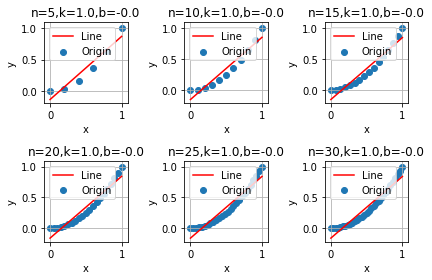

In [12]:
problem41()

In [13]:
problem42()

n趋近于无穷时,c1,c2的值逼近1.0000000000000004,-0.16666649999983363
此时,函数f(c1,c2)的值为:0.005555555555666665


# 5

In [14]:
def f(x):
    return x**2 * math.sin(x)


def problem():
    '''
	课本202页最上方查公式
		分别使用复化梯形公式,复化Simpson公式计算fx从-2,到2上的积分,
	区间分为20,40,80,200个小区间,并计算其精确值,比较计算精度情况

	'''
    N = [20, 40, 80, 200]
    a = 0
    b = math.pi
    sumfk = 0
    for n in N:
        h = (b - a) / n  #区间长度
        sumfk = 0

        for i in range(1, n):
            sumfk = sumfk + f(a + i * h)
        Tn = (b - a) * (f(a) + 2 * sumfk + f(b)) / (2 * n)
        sumfk2 = 0
        for i in range(0, n):
            sumfk2 = sumfk2 + f(a + (i + 0.5) * h)
        Sn = (b - a) * (f(a) + 4 * sumfk2 + 2 * sumfk + f(b)) / (6 * n)
        print(f'n={n},复化梯形公式计算得Tn={Tn},复化Simpson公式得Sn={Sn}')


if __name__ == "__main__":
    integrate.quad(f, 0, math.pi)
    print(f'f(x)=x^2*sin(x)在0到pi上的真实积分为积分为{integrate.quad(f,0,math.pi)[0]}')
    problem()


f(x)=x^2*sin(x)在0到pi上的真实积分为积分为5.869604401089359
n=20,复化梯形公式计算得Tn=5.849312656835287,复化Simpson公式得Sn=5.869603946057626
n=40,复化梯形公式计算得Tn=5.864531123752041,复化Simpson公式得Sn=5.86960437286956
n=80,复化梯形公式计算得Tn=5.8683360605901775,复化Simpson公式得Sn=5.869604399329049
n=200,复化梯形公式计算得Tn=5.869401465663191,复化Simpson公式得Sn=5.8696044010443185


# 6

《数值分析方法与应用》第218页第六单元第1题方程的真实通解为:Eq(u(x), x**2*(1.0*2.71828182845905**x + C1))
可得方程的特解为:x**2*(1.0*2.71828182845905**x - 2.71828182845905)
《数值分析方法与应用》第218页第六单元第1题使用Euler方法得到的结果已经保存到./61/Euler.jpg
《数值分析方法与应用》第218页第六单元第1题使用改进Euler方法得到的结果已经保存到./61/EulerPlus.jpg
《数值分析方法与应用》第218页第六单元第1题使用Runge-Kutta方法得到的结果已经保存到./61/RK.jpg


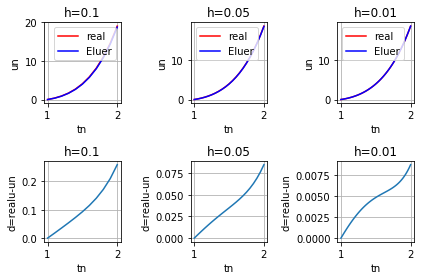

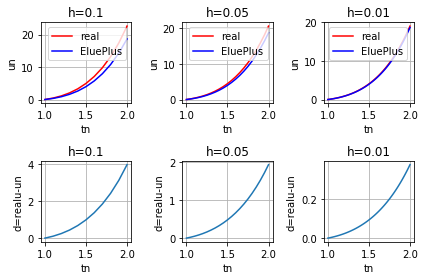

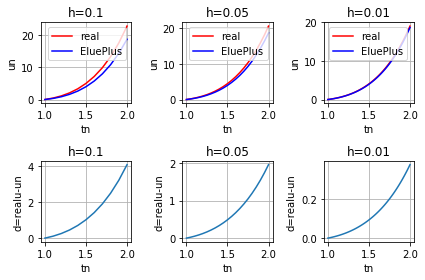

In [15]:
#1
#print(f'《数值分析方法与应用》第218页第六单元第1题结果已经保存到./61文件夹内')
import matplotlib.pyplot as plt 
import os 
import math 
if not os.path.exists('./61'):
	os.mkdir('./61')
from sympy import *
u=Function('u')
x=Symbol('x')
eq1=u(x).diff(x)-2*u(x)/x-x*x*pow(math.e,x)
realeq=dsolve(eq1,u(x))
print(f'《数值分析方法与应用》第218页第六单元第1题方程的真实通解为:{realeq}')
print(f'可得方程的特解为:x**2*(1.0*2.71828182845905**x - 2.71828182845905)')
#x=1
def u(x):
	return x**2*(1.0*2.71828182845905**x - 2.71828182845905)
 
steps=[0.1,0.05,0.01]
start=1
end=2
plt.figure()
count=1
for s in steps:
	h=s
	N =int((end-start)/h) 
	X=[1]
	U=[0]
	realU=[0]
	u1=0
	d=[0]
	for n  in range(1,N+1):
		xn=start+h*n
		u2=u1+h*(2*u1/xn+xn*xn*pow(math.e,xn))
		X.append(xn)
		U.append(u2)
		realU.append(u(xn))
		d.append(abs(u(xn)-u2))
		u1=u2
	plt.subplot(2,3,count)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('un')
	plt.plot(X,U,'-r')
	plt.plot(X,realU,'-b')
	plt.legend(['real','Eluer'])
	plt.subplot(2,3,count+3)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('d=realu-un')
	plt.plot(X,d)
	count=count+1
plt.tight_layout()
print(f'《数值分析方法与应用》第218页第六单元第1题使用Euler方法得到的结果已经保存到./61/Euler.jpg')
plt.savefig('./61/Euler.jpg')
	

#使用改进的Euler计算
steps=[0.1,0.05,0.01]
start=1
end=2
plt.figure()
count=1
for s in steps:
	h=s
	N =int((end-start)/h) 
	X=[1]
	U=[0]
	d=[0]
	realU=[0]
	u1=0
	for n  in range(1,N+1):
		xn=start+h*n
		k1=2*u1/xn+xn*xn*pow(math.e,xn)
		k2=2*(u1+h*k1)/(xn+h)+(xn+h)*(xn+h)*pow(math.e,xn+h)
		u2=u1+0.5*h*(k1+k2)
		X.append(xn)
		U.append(u2)
		realU.append(u(xn))
		d.append(abs(u(xn)-u2))
		u1=u2

	plt.subplot(2,3,count)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('un')
	plt.plot(X,U,'-r')
	plt.plot(X,realU,'-b')
	plt.legend(['real','EluePlus'])
	plt.subplot(2,3,count+3)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('d=realu-un')
	plt.plot(X,d)
	count=count+1
plt.tight_layout()
print(f'《数值分析方法与应用》第218页第六单元第1题使用改进Euler方法得到的结果已经保存到./61/EulerPlus.jpg')
plt.savefig('./61/EulerPlus.jpg')

#使用Runge-Kutta方法
steps=[0.1,0.05,0.01]
start=1
end=2
plt.figure()
count=1
for s in steps:
	h=s
	N =int((end-start)/h) 
	X=[1]
	U=[0]
	d=[0]
	realU=[0]
	u1=0
	for n  in range(1,N+1):
		xn=start+h*n
		k1= 2*u1/xn+xn*xn*pow(math.e,xn)
		k2= 2*(u1+0.5*h*k1)/(xn+0.5*h)+(xn+0.5*h)*(xn+0.5*h)*pow(math.e,(xn+0.5*h))
		k3= 2*(u1+0.5*h*k2)/(xn+0.5*h)+(xn+0.5*h)*(xn+0.5*h)*pow(math.e,(xn+0.5*h))

		k4= 2*(u1+h*k3)/(xn+h)+(xn+h)*(xn+h)*pow(math.e,(xn+h))
		u2=u1+h*(k1+2*k2+2*k3+k4)/6
		X.append(xn)
		U.append(u2)
		realU.append(u(xn))
		d.append(abs(u(xn)-u2))
		u1=u2

	plt.subplot(2,3,count)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('un')
	plt.plot(X,U,'-r')
	plt.plot(X,realU,'-b')
	plt.legend(['real','EluePlus'])
	plt.subplot(2,3,count+3)
	plt.grid()
	plt.title(f'h={s}')
	plt.xlabel('tn')
	plt.ylabel('d=realu-un')
	plt.plot(X,d)
	count=count+1
plt.tight_layout()
print(f'《数值分析方法与应用》第218页第六单元第1题使用Runge-Kutta方法得到的结果已经保存到./61/RK.jpg')
plt.savefig('./61/RK.jpg')